<a href="https://colab.research.google.com/github/dcontrerascaballol/inventos/blob/main/Trabajo_ML_Kaggle_Daniel_Contreras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabajo de Machine

### Desafio de Kaggle Titanic

#### Daniel Contreras Caballol

<img src="titanic.png">

Para dar cumplimiento con el trabajo encomendado, se selecciona el desafío Titanic de la plataforma [Kaggle](https://www.kaggle.com/c/titanic)

In [ ]:
#Carga de librerias que se utiizarán

%matplotlib inline

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from funpymodeling.exploratory import freq_tbl, status, profiling_num


import matplotlib.pyplot as plt
import seaborn as sns
from qgrid import show_grid


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score, roc_auc_score, accuracy_score




In [ ]:
data= pd.read_csv("titanic.csv")

In [ ]:
data.shape

(891, 12)

In [ ]:
len(data)

891

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Descripcion de las variables
 (entregada por Kaggle)

Survival: 0 = No, 1 = Yes

pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
status(data)

variable  q_nan     p_nan  q_zeros   p_zeros  unique     type
0   PassengerId      0  0.000000        0  0.000000     891    int64
1      Survived      0  0.000000      549  0.616162       2    int64
2        Pclass      0  0.000000        0  0.000000       3    int64
3          Name      0  0.000000        0  0.000000     891   object
4           Sex      0  0.000000        0  0.000000       2   object
5           Age    177  0.198653        0  0.000000      88  float64
6         SibSp      0  0.000000      608  0.682379       7    int64
7         Parch      0  0.000000      678  0.760943       7    int64
8        Ticket      0  0.000000        0  0.000000     681   object
9          Fare      0  0.000000       15  0.016835     248  float64
10        Cabin    687  0.771044        0  0.000000     147   object
11     Embarked      2  0.002245        0  0.000000       3   object

In [ ]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Reflexiones

Al mirar los datos, los datos podemos identificar que algunas variables númericas representan categorias (ej. clase o si sobrevivio). Adicionalmente, la variable númerica edad tiene nulos (se debe pensar que hacer, si borrar esos registros, completar con mediana o promedio, o compeltar con 0).


Por parte de las variables categoricas, se observa que algunas como ticket o embarked, no parecen aportar mucho a ser una variable que permita o no sobrevivir, similar impresión entrega la variable Cabina (quizas con un análisis profundo de las ubicaciones de tales en el Titanic pudiese ser de mayor interés, pero la variable Clase recoge lo necesario en este aspecto).

Ahora, con respecto a los nulos, los de cabina, no afectan el modelo (toda vez que pensamos eliminarlo), con respecto a la edad, me parece que corresponde ver las alternativas de borrar los registros que tengan na, y la otra imputar el valor por la promedio (se observan 88 tipos de valores, y en el histograma una distribucion inclinada hacia la izquierda).

Por último, con la variable sobrevivencia, se observan una alta cantida de ceros (549), lo que nos revela que es una codificacion de una variable categórica, y el cero corresponde a no sobrevivió.

### Distribución variables númericas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023DA4CD9220>,
      dtype=object)

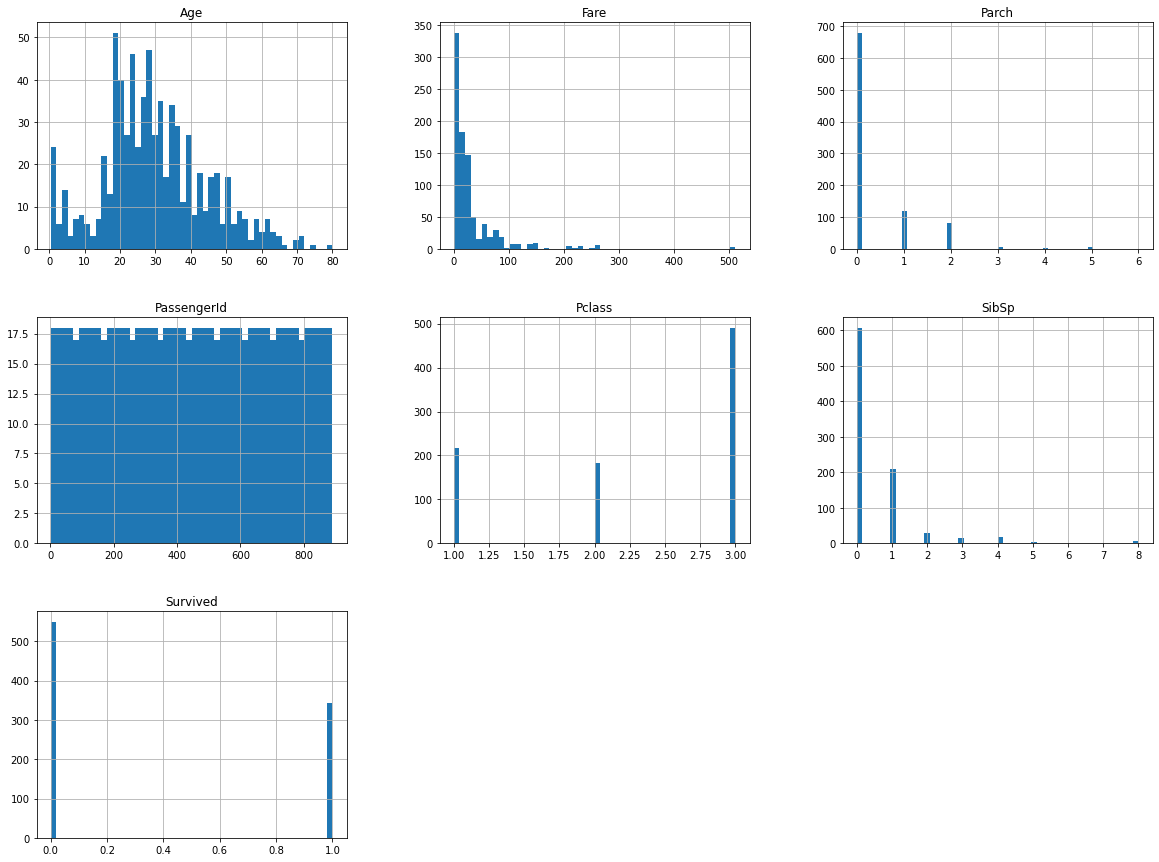

In [ ]:
data.hist(bins=50, figsize=(20,15))

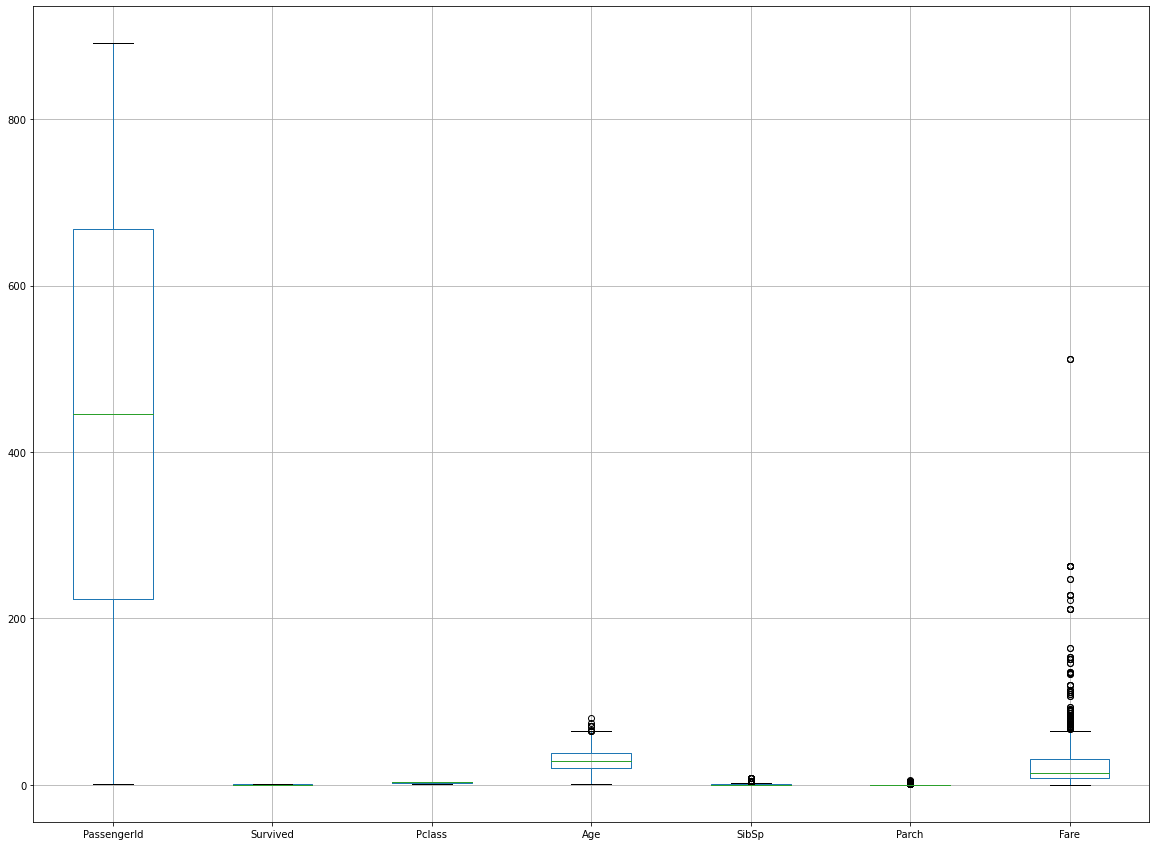

In [ ]:
data.boxplot(figsize=(20,15))

### Distribución variables Categóricas

In [ ]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F2             3
              ..
B78            1
C54            1
B38            1
B19            1
C82            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
data['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
CA 2144              6
347088               6
                    ..
SC/Paris 2163        1
312993               1
STON/O 2. 3101269    1
347081               1
36967                1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
# otra forma de explorar los datos
freq_tbl(data)

                                     Name  frequency  percentage  \
0                  Ford, Mr. William Neal          1    0.001122   
1                      Farthing, Mr. John          1    0.001122   
2                  Plotcharsky, Mr. Vasil          1    0.001122   
3              Newell, Mr. Arthur Webster          1    0.001122   
4            Duran y More, Miss. Asuncion          1    0.001122   
..                                    ...        ...         ...   
886                 Dantcheff, Mr. Ristiu          1    0.001122   
887           Parrish, Mrs. (Lutie Davis)          1    0.001122   
888  Hagland, Mr. Konrad Mathias Reiersen          1    0.001122   
889                  McGovern, Miss. Mary          1    0.001122   
890                  Marechal, Mr. Pierre          1    0.001122   

     cumulative_perc  
0           0.001122  
1           0.002245  
2           0.003367  
3           0.004489  
4           0.005612  
..               ...  
886         0.995511  

### Exploración de variables a nivel general

In [ ]:
ProfileReport (data)

Render HTML: 100%|#######################################################################| 1/1 [00:01<00:00,  1.28s/it]


- Podemos identificar que existe una alta cardinalidad de las variables Ticket y Cabina (lo que complementa una decisión de prescindir de ellas). Adicionalmente, un alto porcentaje de ceros en SibSp y Parch, lo que indica la no existencia de una determinada condición.

### Exploración de variables de interés

In [ ]:
data['Survived'].value_counts() #variable target


0    549
1    342
Name: Survived, dtype: int64

In [ ]:
data['Survived'].value_counts('%')

0    0.616162
1    0.383838
Name: Survived, dtype: float64

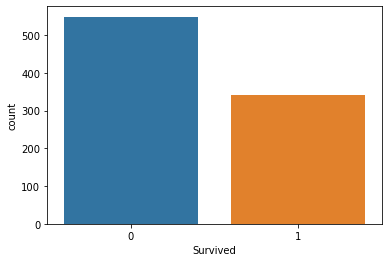

In [ ]:
sns.countplot(data['Survived'],label="Count")

In [ ]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

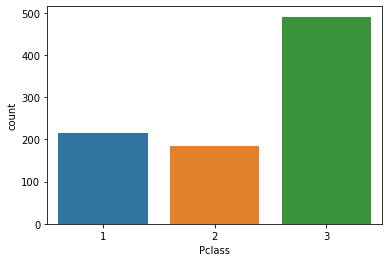

In [ ]:
sns.countplot(data['Pclass'],label="Count")

In [ ]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

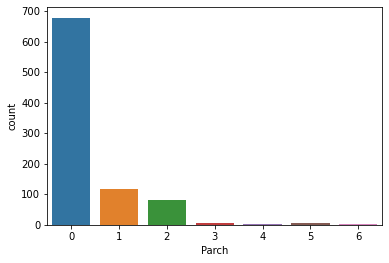

In [ ]:
sns.countplot(data['Parch'],label="Count")

In [ ]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

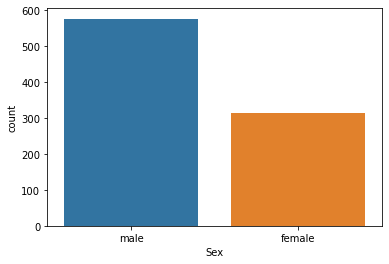

In [ ]:
sns.countplot(data['Sex'],label="Count")

In [ ]:
data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

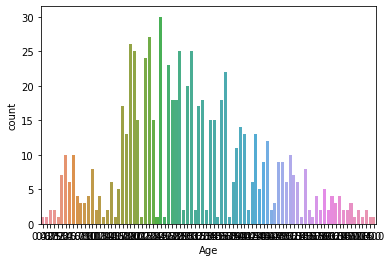

In [ ]:
sns.countplot(data['Age'],label="Count")

In [ ]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

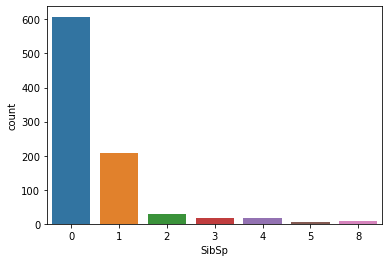

In [ ]:
sns.countplot(data['SibSp'],label="Count")

In [ ]:
data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

- Parece conveniendo mirar posibles correlaciones entre variables

In [ ]:
data.corr(method='pearson')

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [ ]:
data.corr(method='kendall')

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.004090 -0.026824  0.027542 -0.048394  0.000798   
Survived       -0.004090  1.000000 -0.323533 -0.043385  0.085915  0.133933   
Pclass         -0.026824 -0.323533  1.000000 -0.286081 -0.039552 -0.021019   
Age             0.027542 -0.043385 -0.286081  1.000000 -0.142746 -0.200112   
SibSp          -0.048394  0.085915 -0.039552 -0.142746  1.000000  0.425241   
Parch           0.000798  0.133933 -0.021019 -0.200112  0.425241  1.000000   
Fare           -0.008921  0.266229 -0.573531  0.093249  0.358262  0.330360   

                 Fare  
PassengerId -0.008921  
Survived     0.266229  
Pclass      -0.573531  
Age          0.093249  
SibSp        0.358262  
Parch        0.330360  
Fare         1.000000

### Reflexion 2

Despues de realizar una exploración de posibles correlaciones, se observa un cierta relación entre el miedo y la clase del pasajero (negativa) es decir el miedo aumenta a medida que  transita desde la clase más acomodada a la menos (lo que parece algo "intuitivo" considerando el privilegio en los protocolos de emergencia).

Con respecto a correlación entre sorebrevivencia y otras variables, vemos que hay relación negativa con la clase, y una cierta relación positiva con el miedo (dato que le encanta a teóricos conductuales).

- Ahora se debe recordar, que la correlación no considera a las variables categóricas.


In [ ]:
corr_matrix = data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

C:\Users\dcont\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


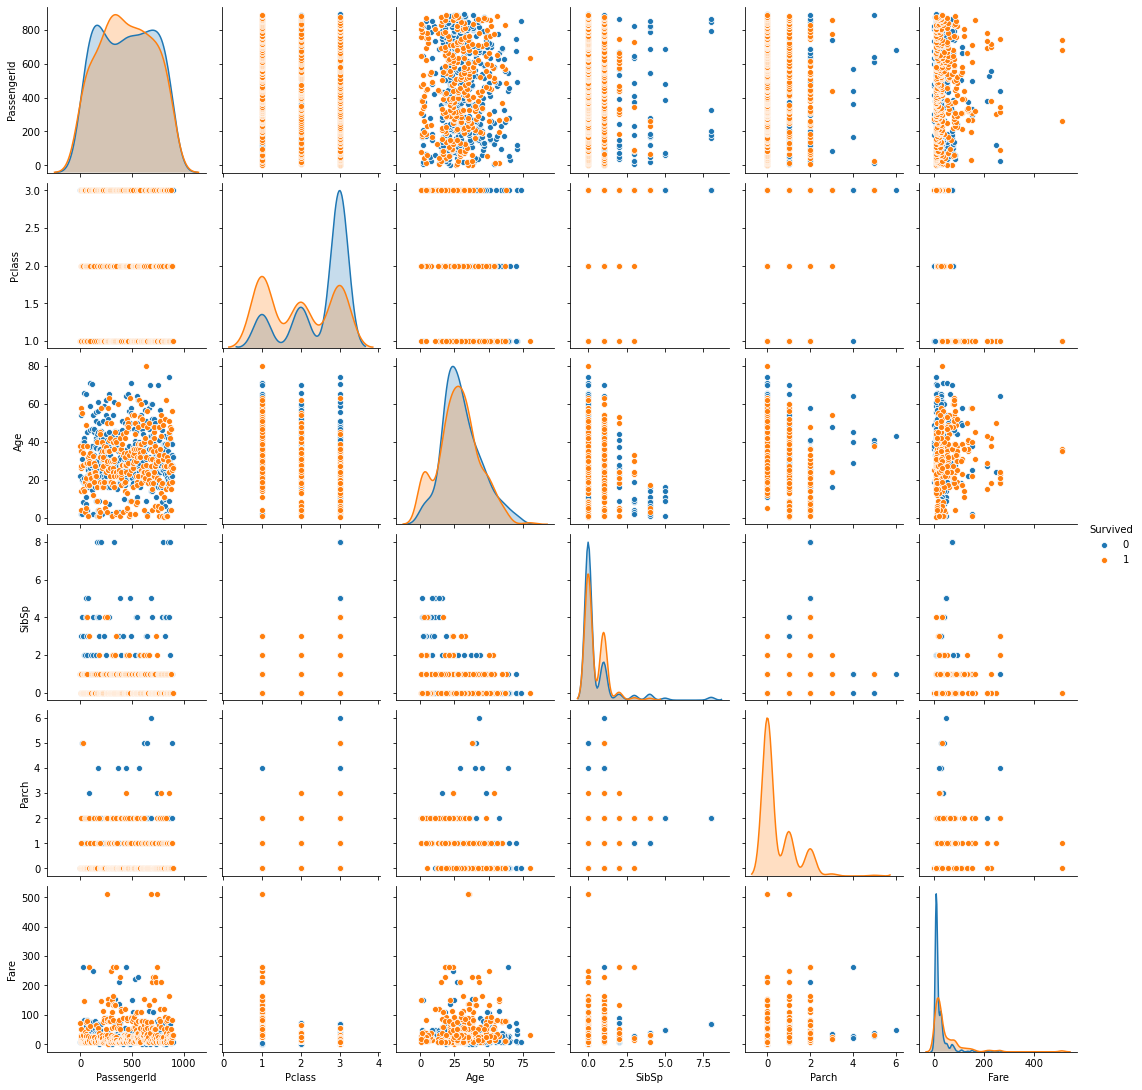

In [ ]:
sns.pairplot(data, hue="Survived")

### Reflexion 3

Dado los datos, parece pertinente explorar el nivel de sobrevivencia por variable de mayor interés, dado a los indicios relevados.

In [ ]:
data.groupby('Sex')[['Survived']].mean()


Survived
Sex             
female  0.742038
male    0.188908

In [ ]:
data.groupby('Pclass')[['Survived']].mean()


Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

In [ ]:
data.pivot_table('Survived', index='Sex', columns='Pclass')


Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

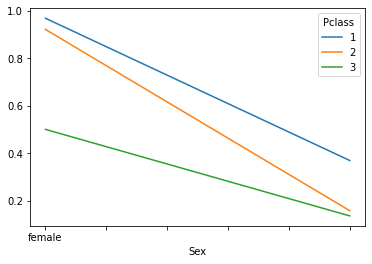

In [ ]:
data.pivot_table('Survived', index='Sex', columns='Pclass').plot()


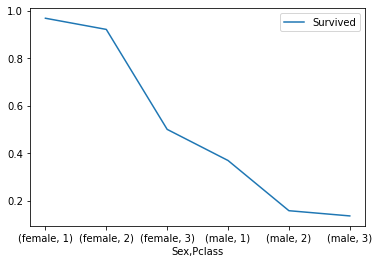

In [ ]:
data.pivot_table(index=['Sex','Pclass'],values=['Survived'], aggfunc=np.mean).plot()


In [ ]:
data.groupby('Age')[['Survived']].mean()


Survived
Age            
0.42        1.0
0.67        1.0
0.75        1.0
0.83        1.0
0.92        1.0
...         ...
70.00       0.0
70.50       0.0
71.00       0.0
74.00       0.0
80.00       1.0

[88 rows x 1 columns]

In [ ]:
data.groupby('Survived')[['Age']].mean()


Age
Survived           
0         30.626179
1         28.343690

In [ ]:
data.groupby('Survived')[['Parch']].mean()

Parch
Survived          
0         0.329690
1         0.464912

In [ ]:
data.groupby('Survived')[['SibSp']].mean()

SibSp
Survived          
0         0.553734
1         0.473684

### Reflexion 4

Para los que no están familiarizados con documentales o peliculas realizadas entorno a este naufragio, los datos explorados nos entregan ciertas señales, ellas, apuntan a que existía una mayor probabilidad de sobrevivir para aquellas personas que eran de sexo femenino, pero ello aumentaba al considerar una mayor clase social de la época.

In [ ]:
data2=data.drop(['Embarked','Cabin','Ticket','Name','PassengerId', 'SibSp', 'Parch'], axis=1) #eliminamos variables

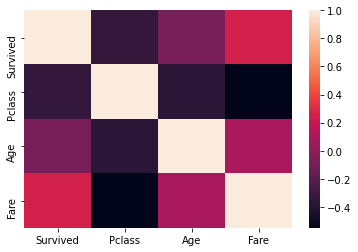

In [ ]:
sns.heatmap(data2.corr(), fmt = ".2f") #examinarmos posibles relaciones entre variables


In [ ]:
data_d=pd.get_dummies(data2, drop_first=True) #usar get dummies para transformar la variable sexo

In [ ]:
data_d.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Sex_male'], dtype='object')

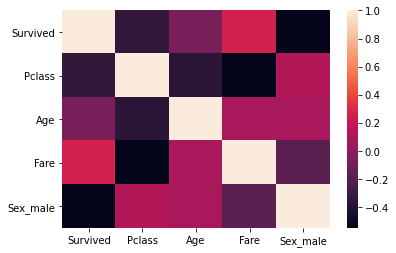

In [ ]:
sns.heatmap(data_d.corr(), fmt = ".2f") #examinarmos posibles relaciones entre variables de los datos ahora con la variable Sex en dummies



In [ ]:
corr_matrix_2 = data_d.corr()
corr_matrix_2["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Age        -0.077221
Pclass     -0.338481
Sex_male   -0.543351
Name: Survived, dtype: float64

- Los datos que nos entrega la correlación se alinea con lo ya presentado, con respecto a la posible mayor probabilidad de sobrevivencia para mujeres conrespecto a los hombres.

#### Arreglo de variables

In [ ]:
#data_d['Age'] = data_d['Age'].replace(np.nan, data_d['Age'].mean()) #de las alternativas disponibles como eliminar los
#registros con valores na, usar imputador o pipeline, se usa el replace con el promedio
data_d = data_d.dropna(subset =[ 'Age'])
#data_d['Age'] = pd.cut(data_d['Age'], [0, 18, 80])

In [ ]:
data_d.head()

Survived  Pclass   Age     Fare  Sex_male
0         0       3  22.0   7.2500         1
1         1       1  38.0  71.2833         0
2         1       3  26.0   7.9250         0
3         1       1  35.0  53.1000         0
4         0       3  35.0   8.0500         1

In [ ]:
sc = StandardScaler()
var_scale= ['Age','Fare']
data_d[var_scale]=sc.fit_transform(data_d[var_scale])
data_d.head()


#x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)
# En un momento escalaba todo, lo que me cambiaba variables como el dummies male y la clase que son variables de categorias.

Survived    Pclass       Age      Fare  Sex_male
0         0  0.911232 -0.530377 -0.518978         1
1         1 -1.476364  0.571831  0.691897         0
2         1  0.911232 -0.254825 -0.506214         0
3         1 -1.476364  0.365167  0.348049         0
4         0  0.911232  0.365167 -0.503850         1

### Ahora vamos por el modelo

In [ ]:
x_data=data_d.drop('Survived', axis=1)
y_data=data_d['Survived'] # se ha probado también con y sin la condición (==1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state = 0)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 143
number of training samples: 571


### 1. Regresión logistica

In [ ]:
model_1 = LogisticRegression()
model_1.fit(x_train, y_train)

y_pred_model_1= model_1.predict(x_test)

model_1.score(x_train, y_train)

acc_model_1 = round(model_1.score(x_train, y_train) * 100, 2)
acc_model_1

77.76

In [ ]:
cross_val_score(model_1,x_train,y_train,cv=3,scoring="accuracy")

array([0.81151832, 0.73157895, 0.8       ])

In [ ]:
accuracy_score(y_test,y_pred_model_1)

0.8531468531468531

In [ ]:
y_train_pred_model_1 = cross_val_predict(model_1, x_train, y_train, cv=3)
print ("Matrix:", confusion_matrix(y_train, y_train_pred_model_1 )) #no me gustó como quedo así que no lo seguí utilizando

Matrix: [[293  52]
 [ 73 153]]


In [ ]:
print("Precision:", precision_score(y_train, y_train_pred_model_1 ))
print("Recall:",recall_score(y_train, y_train_pred_model_1 ))
print("F1:",f1_score(y_train, y_train_pred_model_1 ))

Precision: 0.7463414634146341
Recall: 0.6769911504424779
F1: 0.7099767981438516


In [ ]:
y_scores_model_1= cross_val_predict(model_1, x_train, y_train, cv=3, method="decision_function")
print("ROC AUC Score:",roc_auc_score(y_train,y_scores_model_1))

ROC AUC Score: 0.8388033859176605


### 2. Clasificador estocástico descendiente

In [ ]:
model_2= SGDClassifier()
model_2.fit(x_train, y_train)

y_pred_model_2= model_2.predict(x_test)

model_2.score(x_train, y_train)

acc_model_2 = round(model_2.score(x_train, y_train) * 100, 2)
acc_model_2

70.75

In [ ]:
cross_val_score(model_2,x_train,y_train,cv=3,scoring="accuracy")

array([0.78010471, 0.38947368, 0.78421053])

In [ ]:
accuracy_score(y_test,y_pred_model_2)

0.7972027972027972

In [ ]:
y_train_pred_model_2 = cross_val_predict(model_2, x_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_model_2)

array([[298,  47],
       [ 91, 135]], dtype=int64)

In [ ]:
print("Precision:", precision_score(y_train, y_train_pred_model_2))
print("Recall:",recall_score(y_train, y_train_pred_model_2))
print("F1:",f1_score(y_train, y_train_pred_model_2))

Precision: 0.7417582417582418
Recall: 0.5973451327433629
F1: 0.661764705882353


In [ ]:
y_scores_model_2= cross_val_predict(model_2, x_train, y_train, cv=3, method="decision_function")
print("ROC AUC Score:",roc_auc_score(y_train,y_scores_model_2))

ROC AUC Score: 0.8168333974605616


### 3. Random Forest

In [ ]:
model_3= RandomForestClassifier()
model_3.fit(x_train, y_train)

y_pred_model_3 = model_3.predict(x_test)

model_3.score(x_train, y_train)
acc_model_3 = round(model_3.score(x_train, y_train) * 100, 2)
acc_model_3

98.6

In [ ]:
cross_val_score(model_3,x_train,y_train,cv=3,scoring="accuracy")

array([0.7539267 , 0.78421053, 0.85789474])

In [ ]:
accuracy_score(y_test,y_pred_model_3)

0.8111888111888111

In [ ]:
y_train_pred_model_3 = cross_val_predict(model_3, x_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_model_3)

array([[293,  52],
       [ 65, 161]], dtype=int64)

In [ ]:
print("Precision:", precision_score(y_train, y_train_pred_model_3))
print("Recall:",recall_score(y_train, y_train_pred_model_3))
print("F1:",f1_score(y_train, y_train_pred_model_3))

Precision: 0.755868544600939
Recall: 0.7123893805309734
F1: 0.7334851936218679


In [ ]:
y_probas_model_3= cross_val_predict(model_3, x_train, y_train, cv=3, method="predict_proba")
y_scores_model_3= y_probas_model_3[:,1]
print("ROC AUC Score:",roc_auc_score(y_train,y_scores_model_3))

ROC AUC Score: 0.8589329229190714


### 4. Árbol de decisión (Decision Tree Classifier)

In [ ]:
model_4 = DecisionTreeClassifier()
model_4.fit(x_train, y_train)

y_pred_model_4 = model_4.predict(x_test)

model_4.score(x_train, y_train)
acc_model_4 = round(model_4.score(x_train, y_train) * 100, 2)
acc_model_4

98.6

In [ ]:
cross_val_score(model_4,x_train,y_train,cv=3,scoring="accuracy")

array([0.70680628, 0.74736842, 0.78947368])

In [ ]:
accuracy_score(y_test,y_pred_model_4)

0.7552447552447552

In [ ]:
y_train_pred_model_4 = cross_val_predict(model_4, x_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_model_4)

array([[279,  66],
       [ 67, 159]], dtype=int64)

In [ ]:
print("Precision:", precision_score(y_train, y_train_pred_model_4))
print("Recall:",recall_score(y_train, y_train_pred_model_4))
print("F1:",f1_score(y_train, y_train_pred_model_4))

Precision: 0.7066666666666667
Recall: 0.7035398230088495
F1: 0.70509977827051


In [ ]:
y_probas_model_4= cross_val_predict(model_4, x_train, y_train, cv=3, method="predict_proba")
y_scores_model_4= y_probas_model_4[:,1]
print("ROC AUC Score:",roc_auc_score(y_train,y_scores_model_4))

ROC AUC Score: 0.7410221880210337


### 5. SVC (Support Vector Machines)

In [ ]:
model_5 = SVC() # También se probó con Linear, pero el score de este era mayor
model_5.fit(x_train, y_train)

y_pred_model_5 = model_5.predict(x_test)

model_5.score(x_train, y_train)
acc_model_5 = round(model_5.score(x_train, y_train) * 100, 2)
acc_model_5

81.09

In [ ]:
cross_val_score(model_5,x_train,y_train,cv=3,scoring="accuracy")

array([0.78534031, 0.74210526, 0.82105263])

In [ ]:
accuracy_score(y_test,y_pred_model_5)

0.7622377622377622

In [ ]:
predictions_model_5 = cross_val_predict(model_5, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions_model_5)

array([[297,  48],
       [ 76, 150]], dtype=int64)

In [ ]:
print("Precision:", precision_score(y_train, predictions_model_5))
print("Recall:",recall_score(y_train, predictions_model_5))
print("F1:",f1_score(y_train, predictions_model_5))

Precision: 0.7575757575757576
Recall: 0.6637168141592921
F1: 0.7075471698113207


In [ ]:
y_scores_model_5= cross_val_predict(model_5, x_train, y_train, cv=3, method="decision_function")
print("ROC AUC Score:",roc_auc_score(y_train,y_scores_model_5))

ROC AUC Score: 0.8294921123509043


### 6. Gradient Boosting


In [ ]:
model_6=GradientBoostingClassifier()
model_6.fit(x_train, y_train)

y_pred_model_6 = model_6.predict(x_test)

model_6.score(x_train, y_train)
acc_model_6 = round(model_6.score(x_train, y_train) * 100, 2)
acc_model_6

90.54

In [ ]:
cross_val_score(model_6,x_train,y_train,cv=3,scoring="accuracy")

array([0.79057592, 0.81578947, 0.85263158])

In [ ]:
accuracy_score(y_test,y_pred_model_6)

0.8461538461538461

In [ ]:
y_train_pred_model_6 = cross_val_predict(model_6, x_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_model_6)

array([[310,  35],
       [ 68, 158]], dtype=int64)

In [ ]:
print("Precision:", precision_score(y_train, y_train_pred_model_6))
print("Recall:",recall_score(y_train, y_train_pred_model_6))
print("F1:",f1_score(y_train, y_train_pred_model_6))

Precision: 0.8186528497409327
Recall: 0.6991150442477876
F1: 0.7541766109785203


In [ ]:
y_scores_model_6= cross_val_predict(model_6, x_train, y_train, cv=3, method="decision_function")
print("ROC AUC Score:",roc_auc_score(y_train,y_scores_model_6))

ROC AUC Score: 0.8508913684750545


### 7.AdaBoost Classifier

In [ ]:
model_7=AdaBoostClassifier(algorithm='SAMME.R')
model_7.fit(x_train, y_train)

y_pred_model_7 = model_7.predict(x_test)

model_7.score(x_train, y_train)
acc_model_7= round(model_7.score(x_train, y_train) * 100, 2)
acc_model_7

83.01

In [ ]:
cross_val_score(model_7,x_train,y_train,cv=3,scoring="accuracy")

array([0.79581152, 0.72105263, 0.83157895])

In [ ]:
accuracy_score(y_test,y_pred_model_7)

0.8321678321678322

In [ ]:
y_train_pred_model_7 = cross_val_predict(model_7, x_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_model_7)

array([[291,  54],
       [ 70, 156]], dtype=int64)

In [ ]:
print("Precision:", precision_score(y_train, y_train_pred_model_7))
print("Recall:",recall_score(y_train, y_train_pred_model_7))
print("F1:",f1_score(y_train, y_train_pred_model_7))

Precision: 0.7428571428571429
Recall: 0.6902654867256637
F1: 0.7155963302752294


In [ ]:
y_scores_model_7= cross_val_predict(model_7, x_train, y_train, cv=3, method="decision_function")
print("ROC AUC Score:",roc_auc_score(y_train,y_scores_model_7))

ROC AUC Score: 0.8073874567141208


### Reflexion 5

- La regresion logística mejora su score al eliminar una de las dos columnas dummies (sexo), lo mismo pasa para Random Forest y Deecision Tree Classifier.
- La regresión logística y el SVC  mejora al aumentar el tamaño de test. (de 0.2 a 0.3)
- Los algoritmos de "árbol", tienen mejor score que el resto, ahora bien, la diferencia está en las métricas de rendimiento (matriz de confusión, precisión, recall y F1)
- Al entregar la condición igual a sobreviviente en y_data se vislumbra una mejora en los score de SVC, SGDC, Random Forest y Decision Tree Classifier.
- Al escalar solo las variables (Age, Fare) -antes las hacia con todas- mejoran los score de SVC, SGDC y GBC


### Reflexion 6

Dado los resultados, se puede considerar que los mayores niveles de predicción los posee el Modelo que utiliza Random Forest (score y accuracy)

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Stochastic Gradient Decent',
              'Random Forest', 'Decision Tree','SVC',
              'Gradient Boosting','AdaBoost'],
    'Score': [acc_model_1, acc_model_2,
              acc_model_3, acc_model_4, acc_model_5,
              acc_model_6,acc_model_7]
            })
result_predicts = results.sort_values(by='Score', ascending=False)
result_predicts = result_predicts.set_index('Score')
result_predicts.head(10)

Model
Score                            
98.60               Random Forest
98.60               Decision Tree
90.54           Gradient Boosting
83.01                    AdaBoost
81.09                         SVC
77.93         Logistic Regression
70.75  Stochastic Gradient Decent

In [ ]:
# Se pasa a levantar la importancia a nivel de variables de manera de reseleccionar

In [ ]:
importances = pd.DataFrame({'feature':data_d.iloc[:, 1:8],'importance':np.round(model_3.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

importance
feature                             
(F, a, r, e)                   0.321
(A, g, e)                      0.313
(S, e, x, _, m, a, l, e)       0.250
(P, c, l, a, s, s)             0.116

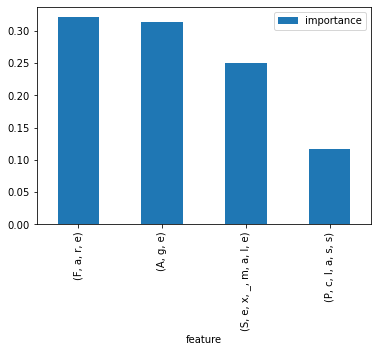

In [ ]:
importances.plot.bar() #la relevancia de Age, podria estar desancadenada por el tipo de tratamiento (reemplazo por media).


### Perfeccionar el Modelo Random Forest

In [ ]:
params_1 = {
    'criterion' : ["gini", "entropy"],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 4, 10, 12],
    'n_estimators' : [3, 10, 30,40,100,200,250,300],
    'max_features': [2,4,6,8],
    'max_depth':[1,2,3]
}


grid_rfc = GridSearchCV(model_3,
                        params_1,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score= False)

In [ ]:
grid_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


C:\Users\dcont\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.22413425 -0.2171167  -0.22941266 ...         nan         nan
         nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_features': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 10, 12],
                         'n_estimators': [3, 10, 30, 40, 100, 200, 250, 300]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
grid_rfc.best_estimator_

RandomForestClassifier(max_depth=3, max_features=4, min_samples_split=10)

In [ ]:
grid_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

### Aplicación de nuevos parámetros RF

In [ ]:
model_3_perfe= RandomForestClassifier(criterion='gini',
                                     max_depth=3,
                                     max_features=4,
                                     min_samples_leaf=1,
                                     min_samples_split=10,
                                     n_estimators=100,
                                     n_jobs=-1)
model_3_perfe.fit(x_train, y_train)

y_pred_model_perfe = model_3_perfe.predict(x_test)

model_3_perfe.score(x_train, y_train)
acc_model_perfe = round(model_3_perfe.score(x_train, y_train) * 100, 2)
acc_model_perfe

82.84

In [ ]:
cross_val_score(model_3_perfe,x_train,y_train,cv=3,scoring="accuracy")

array([0.78534031, 0.81578947, 0.83157895])

In [ ]:
accuracy_score(y_test,y_pred_model_perfe)

0.7972027972027972

In [ ]:
y_train_pred_model_perfe = cross_val_predict(model_3_perfe, x_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_model_perfe)

array([[317,  28],
       [ 80, 146]], dtype=int64)

In [ ]:
print("Precision:", precision_score(y_train, y_train_pred_model_perfe))
print("Recall:",recall_score(y_train, y_train_pred_model_perfe))
print("F1:",f1_score(y_train, y_train_pred_model_perfe))

Precision: 0.8390804597701149
Recall: 0.6460176991150443
F1: 0.73


In [ ]:
y_probas_model_perfe= cross_val_predict(model_3_perfe, x_train, y_train, cv=3, method="predict_proba")
y_scores_model_perfe= y_probas_model_perfe[:,1]
print("ROC AUC Score:",roc_auc_score(y_train,y_scores_model_perfe))

ROC AUC Score: 0.851186353725792


- Se observa una mejora del modelo, no lo suficiente para una buena posición en la respectiva competencia
- Quizas crear tramos en las variables continuas Age y Fare (sobre promedio y posteriormente convertirla en dummies) ayude. (ideas para el futuro)

### Perfeccionar el Modelo Adaboost

In [ ]:
params_2 = {
    'n_estimators' : [50,100,200,250,300],
    'learning_rate': [1.0,2.0,3.0,4.0],
}


grid_adb = GridSearchCV(model_7,
                        params_2,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score= False)

In [ ]:
grid_adb.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 2.0, 3.0, 4.0],
                         'n_estimators': [50, 100, 200, 250, 300]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
grid_adb.best_estimator_

AdaBoostClassifier(n_estimators=200)

In [ ]:
grid_adb.best_params_

{'learning_rate': 1.0, 'n_estimators': 200}

### Aplicación de nuevos parámetros Adaboost

In [ ]:
model_7_perfe= AdaBoostClassifier(algorithm='SAMME.R',
                                 learning_rate=1.0,
                                 n_estimators=200)

model_7_perfe.fit(x_train, y_train)

y_pred_model_perfe_2 = model_7_perfe.predict(x_test)

model_7_perfe.score(x_train, y_train)
acc_model_perfe_2 = round(model_7_perfe.score(x_train, y_train) * 100, 2)
acc_model_perfe_2

85.46

In [ ]:
cross_val_score(model_7_perfe,x_train,y_train,cv=3,scoring="accuracy")

array([0.79581152, 0.73684211, 0.82631579])

In [ ]:
accuracy_score(y_test,y_pred_model_perfe_2)

0.8111888111888111

In [ ]:
y_train_pred_model_perfe_2 = cross_val_predict(model_7_perfe, x_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_model_perfe_2)

array([[290,  55],
       [ 67, 159]], dtype=int64)

In [ ]:
print("Precision:", precision_score(y_train, y_train_pred_model_perfe_2))
print("Recall:",recall_score(y_train, y_train_pred_model_perfe_2))
print("F1:",f1_score(y_train, y_train_pred_model_perfe_2))

Precision: 0.7429906542056075
Recall: 0.7035398230088495
F1: 0.7227272727272729


In [ ]:
y_probas_model_perfe_2= cross_val_predict(model_7_perfe, x_train, y_train, cv=3, method="predict_proba")
y_scores_model_perfe_2= y_probas_model_perfe_2[:,1]
print("ROC AUC Score:",roc_auc_score(y_train,y_scores_model_perfe_2))

ROC AUC Score: 0.8030781069642169


- Al mejorar los parámetros de Adaboost, se mejora las métricas de rendimiento, aún falta para llegar a una cifra sobre el 90% de accuracy

In [ ]:
params_3 = {
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 4, 10, 12],
    'n_estimators' : [3, 10, 30,40,100,200,250,300],
    'max_features': [2,4,6,8],
    'max_depth':[1,2,3],
    'learning_rate': [1.0,2.0,3.0,4.0],
}


grid_gb = GridSearchCV(model_6,
                        params_3,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score= False)

In [ ]:
grid_gb.fit(x_train, y_train)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


C:\Users\dcont\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.24340198 -0.22413425 -0.20665141 ...         nan         nan
         nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 2.0, 3.0, 4.0],
                         'max_depth': [1, 2, 3], 'max_features': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 10, 12],
                         'n_estimators': [3, 10, 30, 40, 100, 200, 250, 300]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
grid_adb.best_estimator_

AdaBoostClassifier(n_estimators=200)

In [ ]:
grid_adb.best_params_

{'learning_rate': 1.0, 'n_estimators': 200}

### Aplicación de nuevos parámetros Gradient Boosting

In [ ]:
model_6_perfe= GradientBoostingClassifier(learning_rate=1.0,
                                 n_estimators=200)

model_6_perfe.fit(x_train, y_train)

y_pred_model_perfe_3 = model_6_perfe.predict(x_test)

model_6_perfe.score(x_train, y_train)
acc_model_perfe_3 = round(model_6_perfe.score(x_train, y_train) * 100, 2)
acc_model_perfe_3

98.6

In [ ]:
cross_val_score(model_6_perfe,x_train,y_train,cv=3,scoring="accuracy")

array([0.73298429, 0.76842105, 0.82631579])

In [ ]:
accuracy_score(y_test,y_pred_model_perfe_3)

0.7412587412587412

In [ ]:
y_train_pred_model_perfe_3 = cross_val_predict(model_6_perfe, x_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred_model_perfe_3)

array([[282,  63],
       [ 65, 161]], dtype=int64)

In [ ]:
print("Precision:", precision_score(y_train, y_train_pred_model_perfe_3))
print("Recall:",recall_score(y_train, y_train_pred_model_perfe_3))
print("F1:",f1_score(y_train, y_train_pred_model_perfe_3))

Precision: 0.71875
Recall: 0.7123893805309734
F1: 0.7155555555555556


In [ ]:
y_probas_model_perfe_3= cross_val_predict(model_6_perfe, x_train, y_train, cv=3, method="predict_proba")
y_scores_model_perfe_3= y_probas_model_perfe_3[:,1]
print("ROC AUC Score:",roc_auc_score(y_train,y_scores_model_perfe_3))

ROC AUC Score: 0.8117994100294985


- Como se observan en los procesos, los métodos ensamblados y boosting, tienen mejor performance, y nos permiten ir experimentando, ahora bien, al realizarles hypertuning, hay un tiempo de procesamiento alto. Es posible, que estás métricas mejoren con alternativas como generar tramos a edad, transformar a dummies y los nuevos tramos de edad. Pero como ejercicio, se profundizó en el uso de diversos algoritmos de clasificación.

- Cabe señalar, que esta competencia de Titanic, es un modelo inicial, y tiene diversas formar de abordajes y literatura al respecto.